In [1]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
files = {
    "music": "data/vivaldi.wav",
    "speech": "data/speech.wav",
    "city": "data/city.wav",
    "nature": "data/nature.wav",
    "own": "data/money.wav"
}

signals = {}

for name, path in files.items():
    y, sr = librosa.load(path, sr=22050)
    signals[name] = (y, sr)

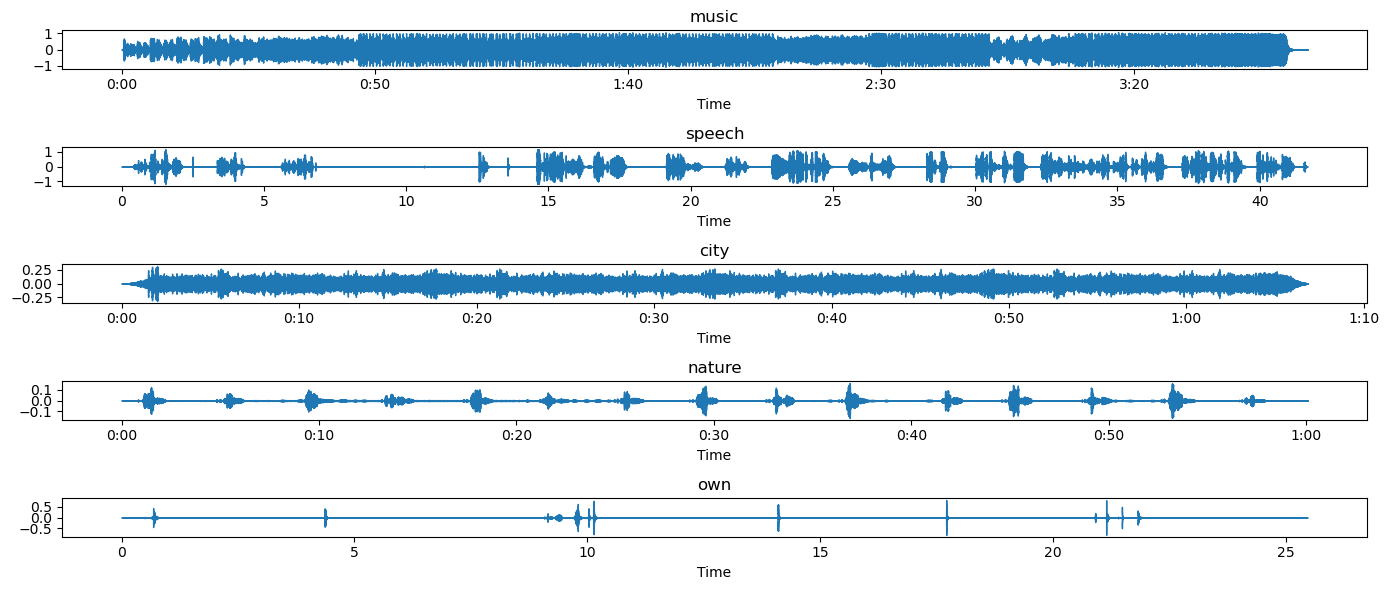

In [4]:
plt.figure(figsize=(14, 6))

for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    plt.subplot(5, 1, i)
    librosa.display.waveshow(y, sr=sr)
    plt.title(name)

plt.tight_layout()
plt.show()

In [5]:
for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    zcr = librosa.feature.zero_crossing_rate(y)

    rms = librosa.feature.rms(y=y)
    stats = {
    "Centroid_Mean": np.mean(cent),
    "Centroid_Std": np.std(cent),
    "ZCR_Mean": np.mean(zcr),
    "RMS_Mean": np.mean(rms)
}
    print("Статистические признаки:\n", stats)

Статистические признаки:
 {'Centroid_Mean': 2067.4738023675304, 'Centroid_Std': 549.2952226752619, 'ZCR_Mean': 0.09741423907117368, 'RMS_Mean': 0.23566996}
Статистические признаки:
 {'Centroid_Mean': 2449.302067334162, 'Centroid_Std': 1285.6020434848797, 'ZCR_Mean': 0.12238595533477171, 'RMS_Mean': 0.08148125}
Статистические признаки:
 {'Centroid_Mean': 1573.5423527699475, 'Centroid_Std': 252.72946958350306, 'ZCR_Mean': 0.07605786353370396, 'RMS_Mean': 0.048708312}
Статистические признаки:
 {'Centroid_Mean': 3102.2494597729406, 'Centroid_Std': 998.3119179597833, 'ZCR_Mean': 0.2293657777482612, 'RMS_Mean': 0.005333872}
Статистические признаки:
 {'Centroid_Mean': 1720.4814781687392, 'Centroid_Std': 1683.1104475252275, 'ZCR_Mean': 0.08954864474134001, 'RMS_Mean': 0.0035104235}


In [6]:
def stat_features(y, sr):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    return {
        "Centroid_Mean": np.mean(cent),
        "Centroid_Std": np.std(cent),
        "RMS_Mean": np.mean(rms),
        "min": np.min(y),
        "max": np.max(y),
        "ZCR_Mean": np.mean(zcr)
    }

stats = {name: stat_features(y, sr) for name, (y, sr) in signals.items()}

In [7]:
stats

{'music': {'Centroid_Mean': 2067.4738023675304,
  'Centroid_Std': 549.2952226752619,
  'RMS_Mean': 0.23566996,
  'min': -1.0240003,
  'max': 1.0629029,
  'ZCR_Mean': 0.09741423907117368},
 'speech': {'Centroid_Mean': 2449.302067334162,
  'Centroid_Std': 1285.6020434848797,
  'RMS_Mean': 0.08148125,
  'min': -1.1617028,
  'max': 1.1766106,
  'ZCR_Mean': 0.12238595533477171},
 'city': {'Centroid_Mean': 1573.5423527699475,
  'Centroid_Std': 252.72946958350306,
  'RMS_Mean': 0.048708312,
  'min': -0.31515187,
  'max': 0.29752594,
  'ZCR_Mean': 0.07605786353370396},
 'nature': {'Centroid_Mean': 3102.2494597729406,
  'Centroid_Std': 998.3119179597833,
  'RMS_Mean': 0.005333872,
  'min': -0.16196415,
  'max': 0.16014682,
  'ZCR_Mean': 0.2293657777482612},
 'own': {'Centroid_Mean': 1720.4814781687392,
  'Centroid_Std': 1683.1104475252275,
  'RMS_Mean': 0.0035104235,
  'min': -0.81067324,
  'max': 0.77352995,
  'ZCR_Mean': 0.08954864474134001}}

In [8]:
stats_df = pd.DataFrame(stats).T
stats_df

,Centroid_Mean,Centroid_Std,RMS_Mean,min,max,ZCR_Mean
music,2067.473802,549.295223,0.235670,-1.024000,1.062903,0.097414
speech,2449.302067,1285.602043,0.081481,-1.161703,1.176611,0.122386
city,1573.542353,252.729470,0.048708,-0.315152,0.297526,0.076058
nature,3102.249460,998.311918,0.005334,-0.161964,0.160147,0.229366
own,1720.481478,1683.110448,0.003510,-0.810673,0.773530,0.089549


## 1. Centroid_Mean — средний спектральный центроид

Что это:  
Спектральный центроид — это «центр тяжести» спектра.
- Низкие значения → звук глухой, низкочастотный  
- Высокие значения → звук яркий, с преобладанием высоких частот  

Интерпретация по классам:
- nature — самый высокий центроид → много высокочастотного шума (листва, птицы)
- speech — высокий → форманты речи
- music — средний → сбалансированный спектр
- city — низкий → гул, транспорт, фон
- own — ближе к city / music

Вывод:  
Хороший признак для разделения *природы*, *речи* и *города*.

## 2. Centroid_Std — стандартное отклонение спектрального центроида

Что это:  
Показывает, насколько частотная структура меняется со временем.

Интерпретация:
- Высокое значение → динамичный, изменчивый звук
- Низкое значение → монотонный, стабильный шум

По классам:
- own — самый нестабильный звук
- speech — высокая вариативность (естественно для речи)
- nature — умеренно вариативный
- music — более структурированная
- city — самый стабильный и монотонный

Вывод:  
Отлично отделяет *городской шум* от *речи* и *собственных записей*.

## 3. RMS_Mean — средняя энергия сигнала (громкость)

Что это:  
RMS (Root Mean Square) отражает энергетическую насыщенность сигнала.

Интерпретация:
- Высокое значение → громкий, плотный сигнал
- Низкое значение → тихий, разреженный

По классам:
- music — самая высокая энергия
- speech — средняя громкость
- city — ниже средней
- nature — очень тихий
- own — самый тихий

Вывод:  
Музыка резко выделяется по этому признаку.

## 4. min / max — минимальная и максимальная амплитуда

Что это:  
Экстремальные значения аудиосигнала.

Интерпретация:
- Широкий диапазон → резкие переходы, высокая динамика
- Узкий диапазон → ровный, фоновый звук

По классам:
- speech, music — почти полный диапазон [-1, 1]
- city, nature — сжатый диапазон
- own — асимметричные пики

Вывод:  
Речь и музыка — наиболее динамичные по амплитуде.

## 5. ZCR_Mean — Zero Crossing Rate

Что это:  
Частота пересечения сигналом нулевого уровня.
- Высокий ZCR → шум, шипение, высокие частоты
- Низкий ZCR → плавный, тональный сигнал

По классам:
- nature — самый высокий ZCR (шумовые компоненты)
- speech — типичное значение для речи
- music — умеренный
- own — ближе к музыкальному
- city — самый низкий (ровный гул)

Вывод:  
ZCR — сильный признак для отделения *природы* от *города* и *музыки*.

## Итоговая характеристика классов

### 🎵 Music
- Высокая RMS
- Средний спектральный центроид
- Умеренный ZCR  
→ плотный, структурированный сигнал

### 🗣 Speech
- Высокая спектральная вариативность
- Средний ZCR
- Широкий динамический диапазон  
→ информативный и динамичный сигнал

### 🏙 City
- Низкий центроид
- Минимальный разброс
- Низкий ZCR  
→ монотонный фоновый шум

### 🌿 Nature
- Самый высокий центроид
- Самый высокий ZCR
- Очень низкая RMS  
→ тихий, шумовой, высокочастотный сигнал

### 🎧 Own
- Максимальная нестабильность спектра
- Низкая энергия
- Средний ZCR  
→ неоднородный класс, сильно зависит от содержания записи

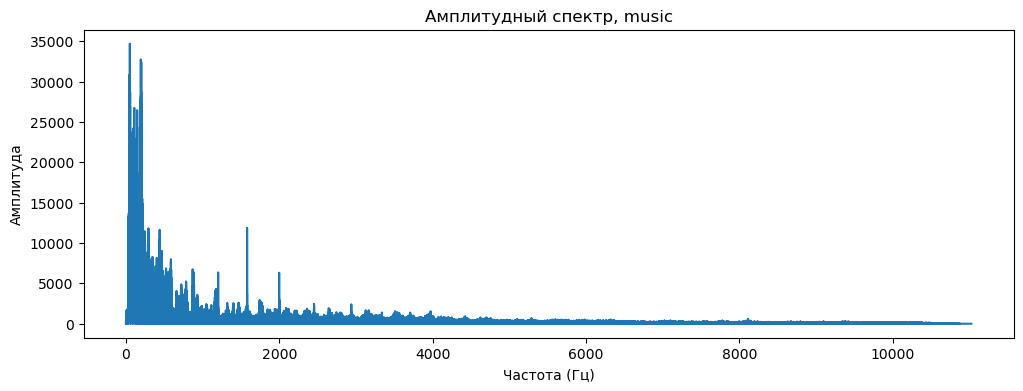

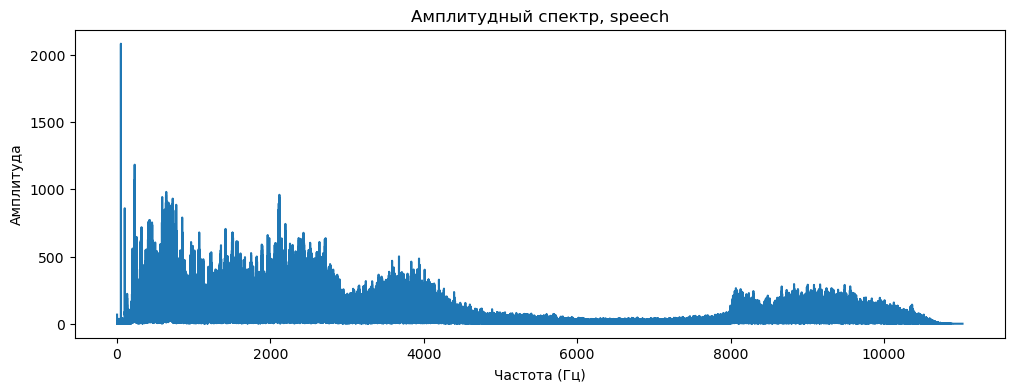

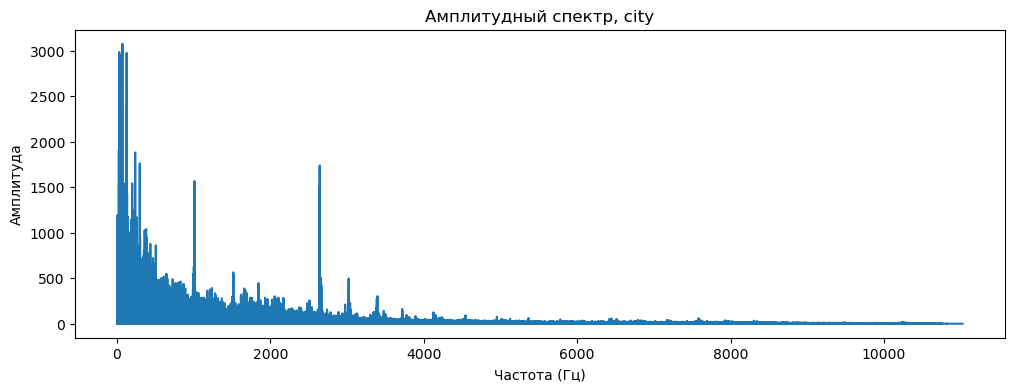

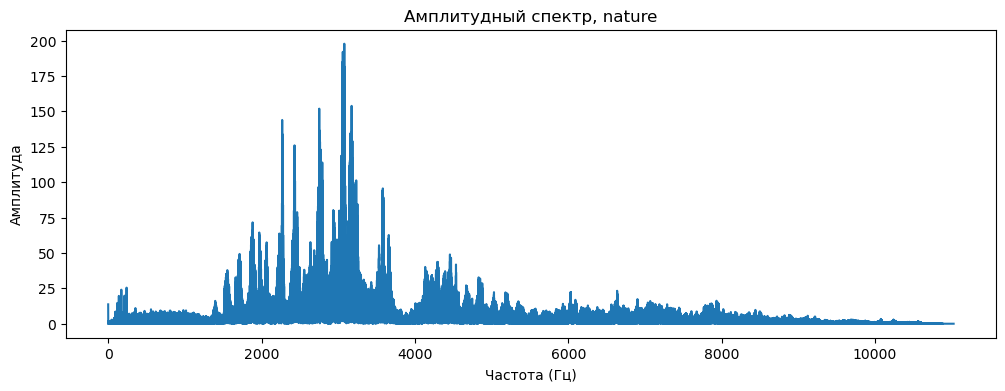

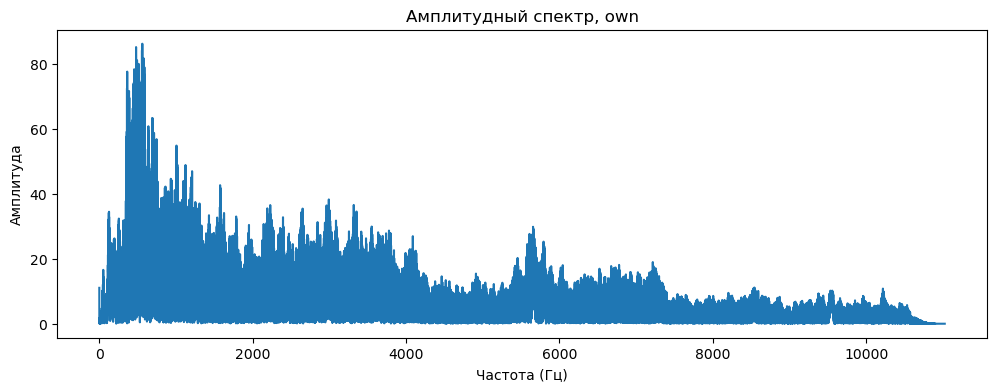

In [9]:
for i, (name, (y, sr)) in enumerate(signals.items(), 1):
    # FFT
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(len(y), 1/sr)

# Берём только положительные частоты
    idx = freqs >= 0

    plt.figure(figsize=(12, 4))
    plt.plot(freqs[idx], np.abs(Y[idx]))
    plt.title(f"Амплитудный спектр, {name}")
    plt.xlabel("Частота (Гц)")
    plt.ylabel("Амплитуда")
    plt.show()

In [10]:
def compute_stft(y):
    return librosa.stft(y, n_fft=2048, hop_length=512)

stfts = {name: compute_stft(y) for name, (y, _) in signals.items()}

In [11]:
signals

{'music': (array([ 2.7284841e-12, -8.1854523e-12, -1.8189894e-12, ...,
          4.1910919e-15,  3.4444669e-14,  6.9166894e-14], dtype=float32),
  22050),
 'speech': (array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -3.3355733e-05, -2.7862439e-05, -3.3756027e-05], dtype=float32),
  22050),
 'city': (array([-5.9685590e-13, -6.8212103e-13, -9.6633812e-13, ...,
         -4.6343240e-04, -5.0715066e-04, -5.3474517e-04], dtype=float32),
  22050),
 'nature': (array([-2.5740246e-07,  3.9958195e-07, -6.0166894e-07, ...,
          3.2086973e-08, -2.8640500e-08,  2.5076588e-08], dtype=float32),
  22050),
 'own': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 22050)}

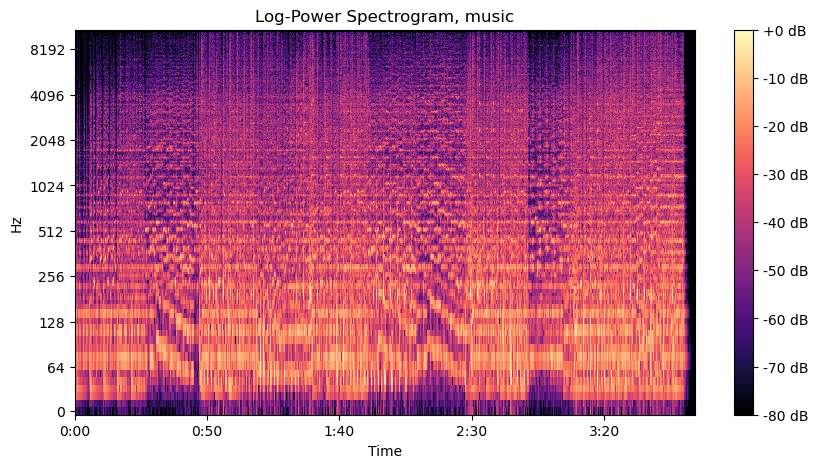

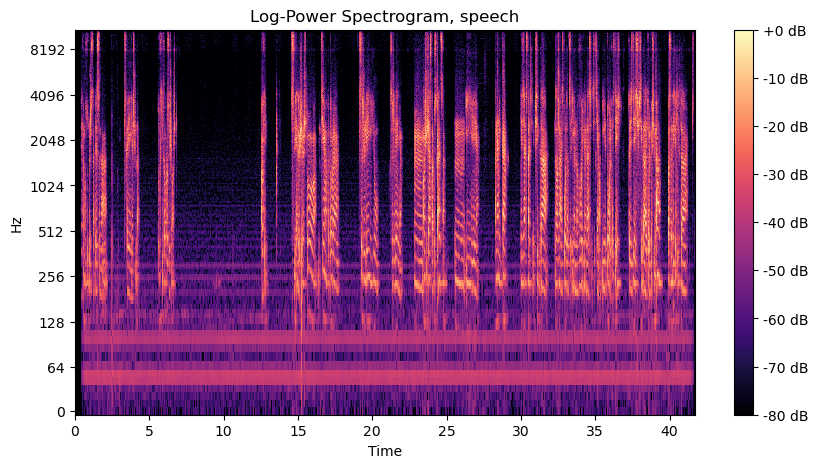

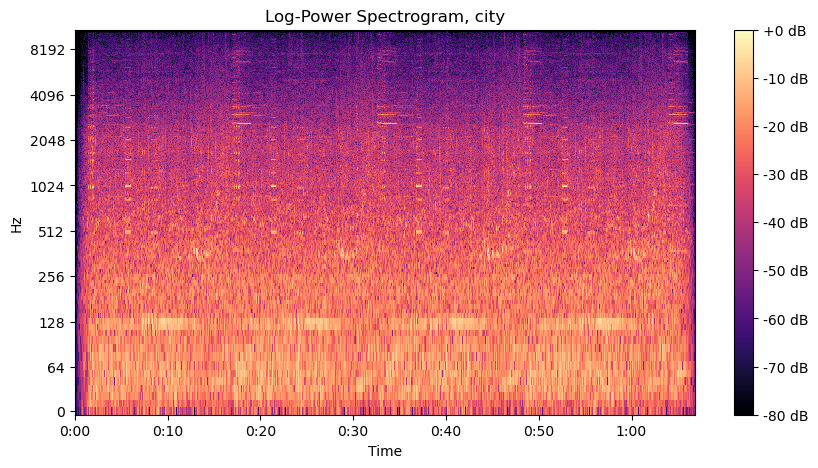

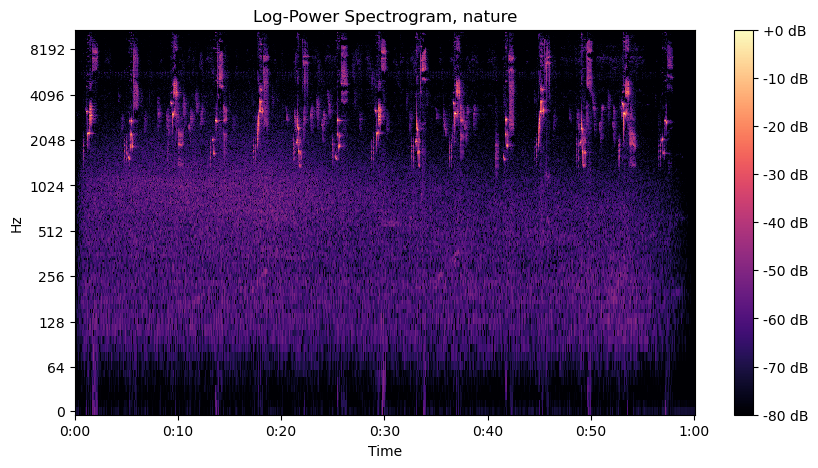

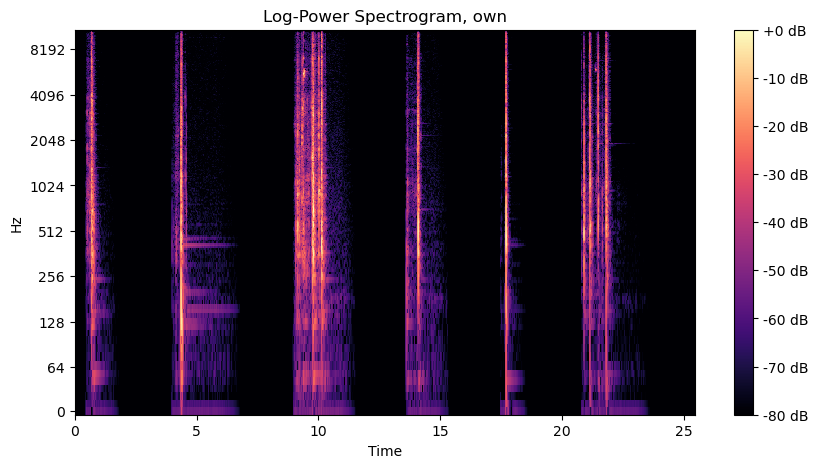

In [12]:
for i, (name, (y,sr)) in enumerate(signals.items(), 1):
    S_magnitude, _ = librosa.magphase(stfts.get(name))

    S_power = S_magnitude ** 2

    S_db = librosa.power_to_db(S_power, ref=np.max)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Power Spectrogram, {name}')
    plt.show()

## Дополнение: ещё 5 разложений сигнала

Для тяжёлых методов (EMD/VMD/NMF) я делала на одном сигнале (`speech`), чтобы ноутбук долго по времени не думал.

In [24]:
%pip -q install EMD-signal

Note: you may need to restart the kernel to use updated packages.


### 1) Вейвлет-разложение (DWT) — `PyWavelets`

Идея: раскладываем сигнал на **аппроксимацию** (низкие частоты) и **детали** (высокие частоты) на нескольких уровнях.


In [15]:
import pywt

def dwt_decompose(y, wavelet="db4", level=5):
    # coeffs: [cA_n, cD_n, cD_{n-1}, ..., cD_1]
    coeffs = pywt.wavedec(y, wavelet=wavelet, level=level)
    cA = coeffs[0]
    cDs = coeffs[1:]
    return coeffs, cA, cDs

dwt_summary = {}
for name, (y, sr) in signals.items():
    coeffs, cA, cDs = dwt_decompose(y, wavelet="db4", level=5)
    energies = [float(np.sum(cA**2))] + [float(np.sum(cd**2)) for cd in cDs]
    dwt_summary[name] = energies

cols = ["E(cA_L5)", "E(cD_L5)", "E(cD_L4)", "E(cD_L3)", "E(cD_L2)", "E(cD_L1)"]
pd.DataFrame(dwt_summary, index=cols).T


,E(cA_L5),E(cD_L5),E(cD_L4),E(cD_L3),E(cD_L2),E(cD_L1)
music,193281.906250,52426.386719,33085.671875,24718.429688,16088.216797,4220.659668
speech,597.540222,1947.995361,2519.441162,4011.044189,2691.970459,1703.797241
city,2285.593750,519.968323,402.648895,311.814697,137.953156,13.648490
nature,0.191935,0.312072,1.550079,67.323112,96.612656,9.944846
own,6.687140,26.564419,21.461132,18.133106,21.259615,11.856241


### Основные наблюдения:

1. **Музыка**
   - Обладает наибольшей энергией на всех уровнях разложения.
   - Основная энергия сосредоточена в аппроксимационной компоненте `cA_L5`, что указывает на сильную низкочастотную и гармоническую структуру.
   - Существенные значения энергии в `cD_L4 – cD_L5` отражают наличие ритмических и тембровых изменений.

2. **Речь**
   - Энергия распределена более равномерно между детализирующими компонентами.
   - Максимальные значения наблюдаются в `cD_L2 – cD_L4`, что соответствует характерным для речи среднечастотным колебаниям.
   - По сравнению с музыкой, низкочастотная аппроксимация выражена слабее.

3. **Городской шум**
   - Энергия заметно ниже, чем у музыки и речи.
   - Преобладание энергии в низкоуровневых деталях (`cD_L1 – cD_L3`) указывает на наличие резких, высокочастотных шумовых событий (машины, сигналы, механические звуки).

4. **Природные звуки**
   - Общая энергия минимальна.
   - Низкие значения `cA_L5` говорят об отсутствии устойчивой гармонической структуры.
   - Относительно более заметная энергия в `cD_L3 – cD_L4` отражает мягкие, но изменчивые шумовые компоненты (ветер, листья, вода).

5. **Собственный сигнал**
   - Энергия распределена достаточно равномерно между уровнями.
   - Отсутствует выраженное доминирование одной компоненты, что говорит о смешанном характере сигнала.
   - По структуре занимает промежуточное положение между речью и шумовыми сигналами.

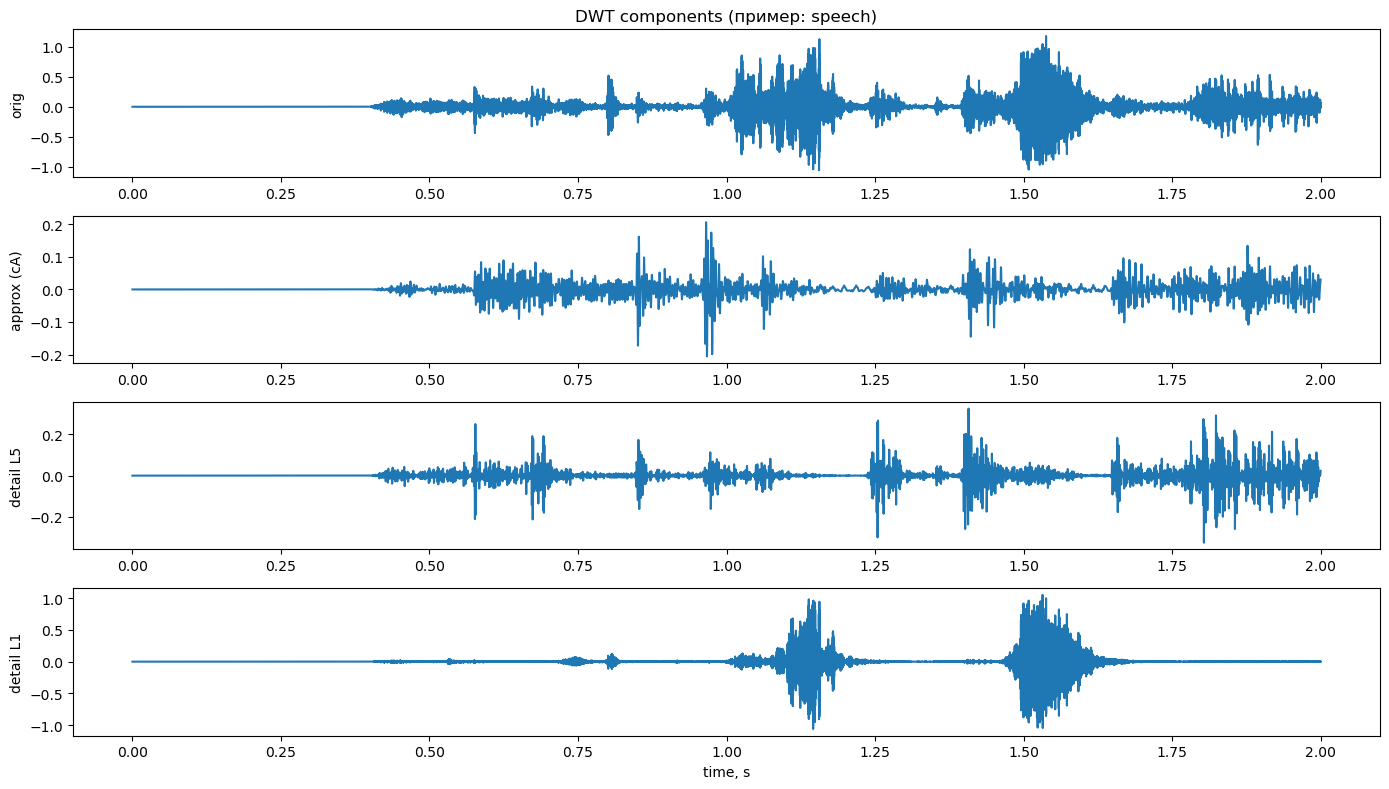

In [16]:
# Визуализация DWT-реконструкции компонентов на примере одного сигнала
example_name = "speech"
y, sr = signals[example_name]
coeffs, cA, cDs = dwt_decompose(y, wavelet="db4", level=5)

# Реконструируем аппроксимацию и детали отдельно
def reconstruct_component(coeffs, keep_index, wavelet="db4"):
    # keep_index: 0 — cA, 1..n — соответствующие cD
    kept = []
    for i, c in enumerate(coeffs):
        kept.append(c if i == keep_index else np.zeros_like(c))
    return pywt.waverec(kept, wavelet=wavelet)

rec_A = reconstruct_component(coeffs, keep_index=0, wavelet="db4")
rec_D5 = reconstruct_component(coeffs, keep_index=1, wavelet="db4")
rec_D1 = reconstruct_component(coeffs, keep_index=len(coeffs)-1, wavelet="db4")  # самый высокий уровень деталей

# Первые 2 секунды
n = int(2*sr)
t = np.arange(n)/sr

plt.figure(figsize=(14,8))
plt.subplot(4,1,1); plt.title(f"DWT components (пример: {example_name})"); plt.plot(t, y[:n]); plt.ylabel("orig")
plt.subplot(4,1,2); plt.plot(t, rec_A[:n]); plt.ylabel("approx (cA)")
plt.subplot(4,1,3); plt.plot(t, rec_D5[:n]); plt.ylabel("detail L5")
plt.subplot(4,1,4); plt.plot(t, rec_D1[:n]); plt.ylabel("detail L1")
plt.xlabel("time, s")
plt.tight_layout()
plt.show()


### 2) Гармонико-перкуссионное разложение (HPSS) — `librosa`

Разбивает сигнал на:
- **Harmonic** (устойчивые тона/ноты)
- **Percussive** (удары/всплески)


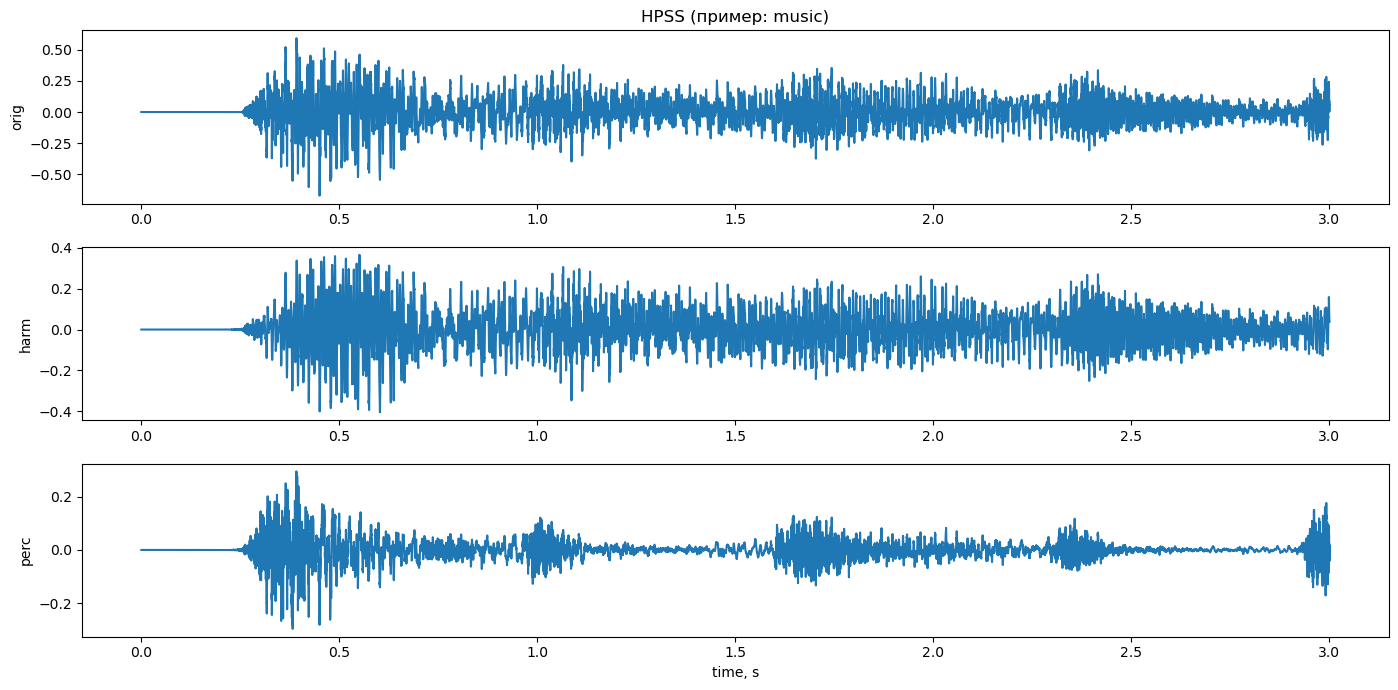

In [17]:
# HPSS лучше всего видно на музыке/городе
example_name = "music"
y, sr = signals[example_name]

y_harm, y_perc = librosa.effects.hpss(y)

n = int(3*sr)
t = np.arange(n)/sr

plt.figure(figsize=(14,7))
plt.subplot(3,1,1); plt.title(f"HPSS (пример: {example_name})"); plt.plot(t, y[:n]); plt.ylabel("orig")
plt.subplot(3,1,2); plt.plot(t, y_harm[:n]); plt.ylabel("harm")
plt.subplot(3,1,3); plt.plot(t, y_perc[:n]); plt.ylabel("perc")
plt.xlabel("time, s")
plt.tight_layout()
plt.show()


Гармоническо-перкуссионное разложение (HPSS) позволило разделить исходный музыкальный сигнал на две принципиально разные составляющие.

- **Гармоническая компонента** содержит основную тональную структуру сигнала и по форме близка к исходной волне, что характерно для музыкальных звуков с устойчивыми частотами.
- **Перкуссионная компонента** выделяет кратковременные импульсы и резкие изменения амплитуды, связанные с атаками и ритмическими элементами.

### 3) NMF-разложение спектрограммы — `sklearn`

Идея: magnitude-спектрограмма \(V\) раскладывается как \(V \approx W H\), где:
- **W** — спектральные «шаблоны» компонентов
- **H** — их активация во времени

Полезно для отделения источников/шумов и как фича-экстракция.


W: (1025, 4) H: (4, 1796)


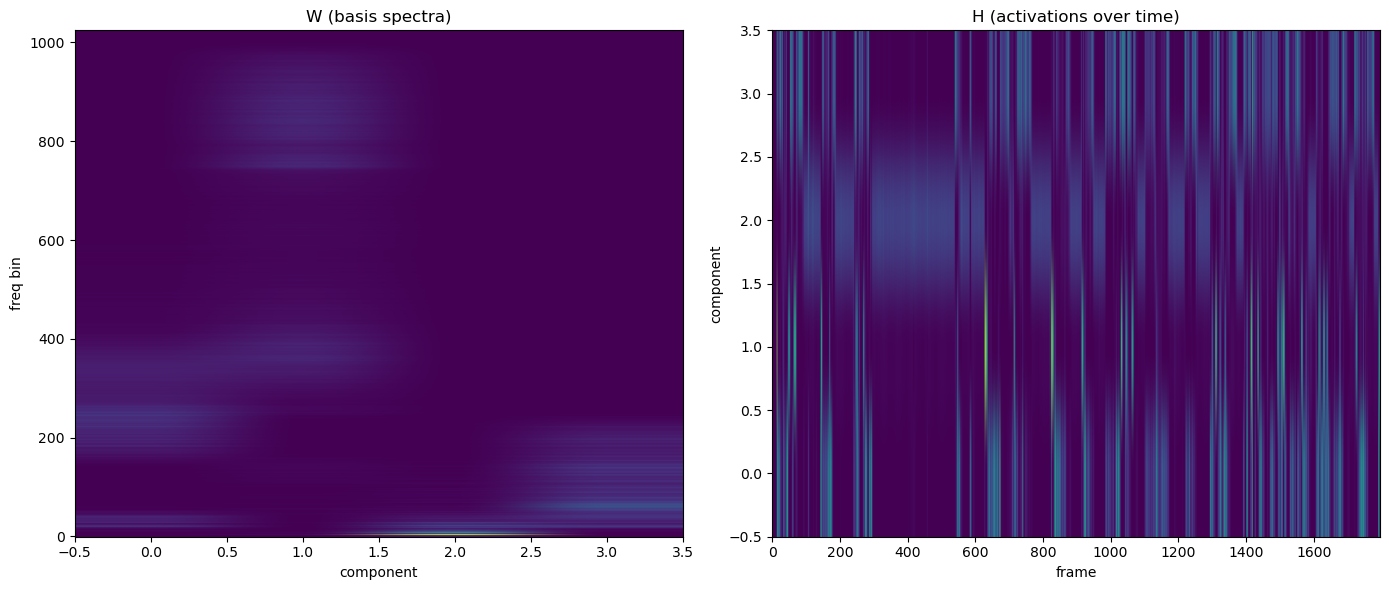

In [19]:
from sklearn.decomposition import NMF

example_name = "speech"
y, sr = signals[example_name]

S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
# чтобы NMF работал стабильнее
V = librosa.util.normalize(S, axis=0)

n_components = 4
nmf = NMF(n_components=n_components, init="nndsvda", max_iter=300, random_state=0)
W = nmf.fit_transform(V) # (freq_bins, components)
H = nmf.components_  # (components, frames)

print("W:", W.shape, "H:", H.shape)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("W (basis spectra)")
plt.imshow(W, aspect="auto", origin="lower")
plt.xlabel("component"); plt.ylabel("freq bin")

plt.subplot(1,2,2)
plt.title("H (activations over time)")
plt.imshow(H, aspect="auto", origin="lower")
plt.xlabel("frame"); plt.ylabel("component")

plt.tight_layout()
plt.show()


Негативно-матричное разложение (NMF) позволило представить спектрограмму сигнала в виде произведения двух неотрицательных матриц: **W** (базисные спектры) и **H** (их временные активации).

- Матрица **W** отражает устойчивые частотные шаблоны сигнала, соответствующие различным спектральным компонентам.
- Матрица **H** показывает, как и в какие моменты времени активируются эти компоненты.
- Видно, что отдельные компоненты имеют локализованные активации, что указывает на наличие повторяющихся звуковых структур.

Таким образом, NMF эффективно выделяет скрытые спектральные паттерны и может использоваться для анализа структуры сигнала, сегментации и последующей классификации аудио.

### 4) EMD — Empirical Mode Decomposition (эмпирическое модовое разложение)

Идея: сигнал сам «разбирается» на набор **IMF-компонент** (intrinsic mode functions), от быстрых колебаний к медленным.

Беру короткий фрагмент ( 2 секунды).


In [ ]:
from PyEMD import EMD

example_name = "speech"
y, sr = signals[example_name]

segment_sec = 2
y_seg = y[:int(segment_sec*sr)]

emd = EMD()
imfs = emd.emd(y_seg)
print("IMFs:", imfs.shape)  # (n_imfs, n_samples)

# нарисуем первые 4 IMF (или меньше, если их меньше)
k = min(4, imfs.shape[0])
t = np.arange(len(y_seg))/sr

plt.figure(figsize=(14, 2*(k+1)))
plt.subplot(k+1,1,1); plt.title(f"EMD (пример: {example_name}, {segment_sec}s)"); plt.plot(t, y_seg); plt.ylabel("orig")

for i in range(k):
    plt.subplot(k+1,1,i+2)
    plt.plot(t, imfs[i])
    plt.ylabel(f"IMF{i+1}")

plt.xlabel("time, s")
plt.tight_layout()
plt.show()


Не дождалась результата. Долго думает.

### 5) VMD — Variational Mode Decomposition

Идея: оптимизационно раскладываем сигнал на \(K\) мод (полосовых компонентов), часто устойчивее к шуму, чем EMD.


Modes u: (4, 44100)


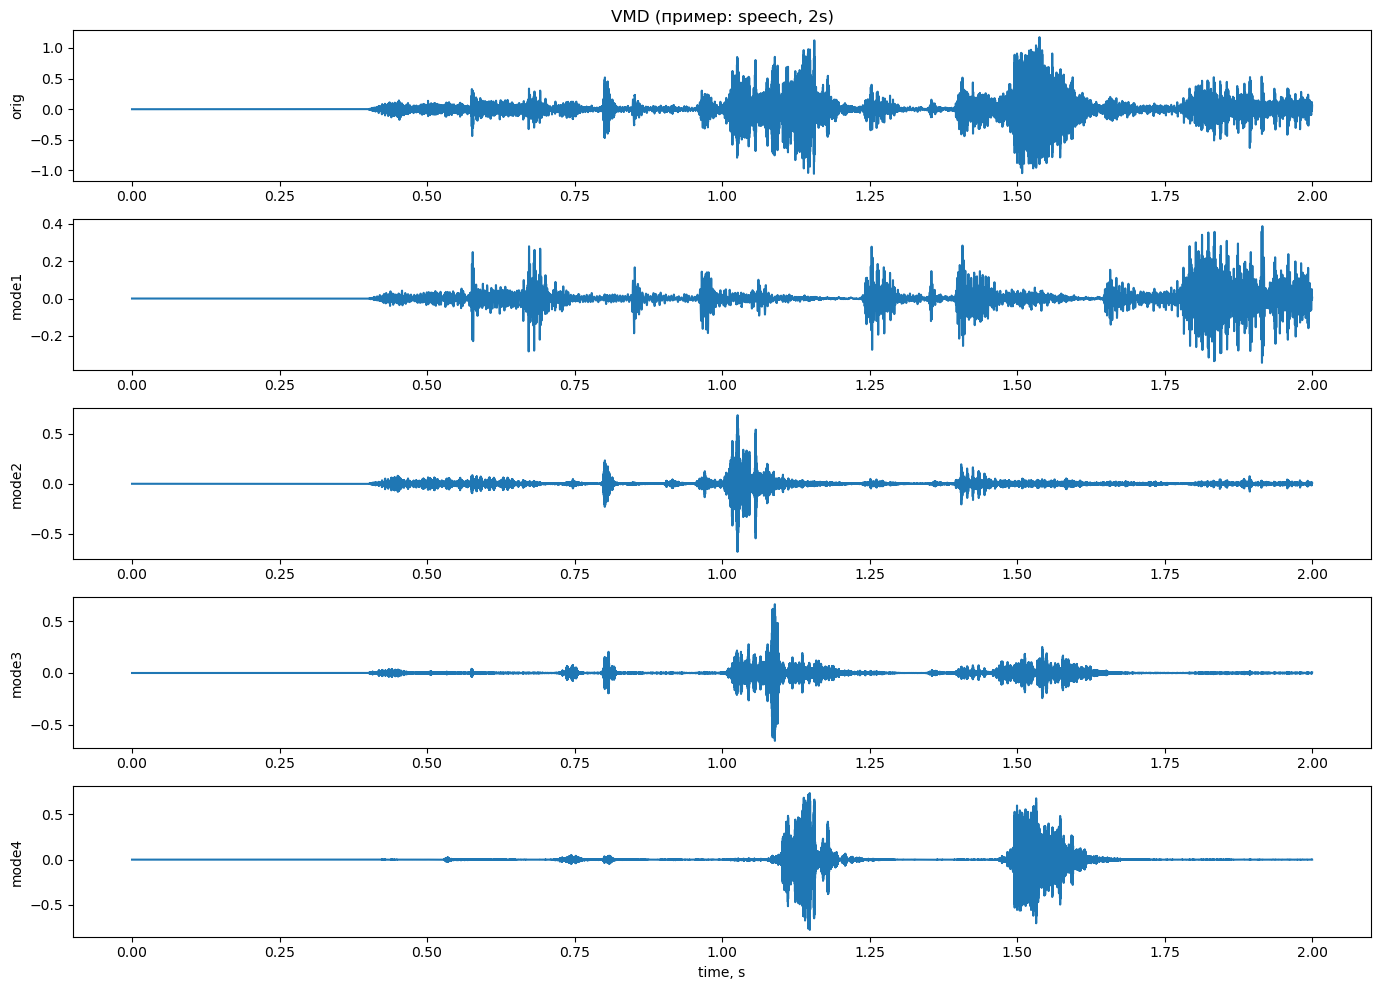

In [23]:
from vmdpy import VMD

example_name = "speech"
y, sr = signals[example_name]

segment_sec = 2
y_seg = y[:int(segment_sec*sr)]

# параметры VMD (можно подбирать)
alpha = 2000       # ширина полос
tau = 0            # шум/слабая регуляризация
K = 4              # число мод
DC = 0
init = 1
tol = 1e-7

u, u_hat, omega = VMD(y_seg, alpha, tau, K, DC, init, tol)
print("Modes u:", u.shape)  # (K, n_samples)

t = np.arange(len(y_seg))/sr
plt.figure(figsize=(14, 2*(K+1)))
plt.subplot(K+1,1,1); plt.title(f"VMD (пример: {example_name}, {segment_sec}s)"); plt.plot(t, y_seg); plt.ylabel("orig")

for i in range(K):
    plt.subplot(K+1,1,i+2)
    plt.plot(t, u[i])
    plt.ylabel(f"mode{i+1}")

plt.xlabel("time, s")
plt.tight_layout()
plt.show()


- Каждая мода содержит колебания в своём узком частотном диапазоне, что хорошо видно по различию форм сигналов.
- Высокоамплитудные и быстрые колебания сконцентрированы в отдельных модах, соответствующих активным речевым фрагментам.
- Более медленные и сглаженные моды отражают низкочастотную структуру и огибающую речи.